In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# configuración de warnings
warnings.filterwarnings('ignore') # ignorar warnings

# configuración de pandas
pd.set_option('display.max_columns', None) # mostrar todas las columnas
plt.style.use('seaborn-v0_8') # estilo de gráficos
plt.rcParams['figure.figsize'] = (12, 8) # tamaño de gráficos


==========================  
    1. Carga y exploración inicial de datos 
=============================

In [2]:
print('=' * 60)
print(' 📊 ANÁLISIS DE RIESGO CREDITICIO - BANK LOAN DATASET')
print('=' * 60)


 📊 ANÁLISIS DE RIESGO CREDITICIO - BANK LOAN DATASET


In [3]:
# carga de datos
try:
    # leer el archivo csv con separador ';'
    df = pd.read_csv('Bankloan.csv', sep=';', encoding='utf-8-sig')
    print('✅ El archivo se ha cargado correctamente.')
except FileNotFoundError:
    print('El archivo no se ha encontrado.') 

✅ El archivo se ha cargado correctamente.


In [4]:
#información del dataset
print(f'''\nINFORMACIÓN GENERAL DEL DATASET:\n
    - Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas \n
    - Período de análisis: dataset historico de préstamos bancarios
''')


INFORMACIÓN GENERAL DEL DATASET:

    - Dimensiones: 700 filas x 9 columnas 

    - Período de análisis: dataset historico de préstamos bancarios



==========================  
    2. Análisis Exploratorio de Datos (EDA) 
=============================

In [5]:
# información básica del dataset
print(f'''
    \n📊 ESTRUCTURA DEL DATASET: \n{df.info} \n
    \n📈 ESTADÍSTICA DESCRIPTIVA: \n {df.describe()}
''')


    
📊 ESTRUCTURA DEL DATASET: 
<bound method DataFrame.info of       age   ed  employ  address       income   debtinc  creddebt  othdebt  \
0    41.0  3.0      17       12  176000000.0   9300000  11359392  5008608   
1    27.0  1.0      10        6   31000000.0  17300000   1362202  4000798   
2    40.0  1.0      15        7          NaN   5500000    856075  2168925   
3    41.0  NaN      15       14  120000000.0   2900000   2658720   821280   
4    24.0  2.0       2        0   28000000.0  17300000   1787436  3056564   
..    ...  ...     ...      ...          ...       ...       ...      ...   
695  36.0  2.0       6       15   27000000.0   4600000    262062   979938   
696  29.0  2.0       6        4   21000000.0  11500000    369495  2045505   
697  33.0  1.0      15        3   32000000.0   7600000    491264  1940736   
698  45.0  1.0      19       22   77000000.0   8400000   2302608  4165392   
699  37.0  1.0      12       14          NaN  14700000   2994684  3473316   

    defaul

In [6]:
# verificar valores faltantes
print('🔎 VALORES FALTANTES:')
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values, 
    'Porcentaje': missing_percentage
}).sort_values('Porcentaje',ascending=False)
print(missing_df[missing_df['Valores Faltantes'] > 0])

🔎 VALORES FALTANTES:
        Valores Faltantes  Porcentaje
income                 37    5.285714
ed                     20    2.857143
age                    19    2.714286


==========================  
    3. Análisis de la variable objetivo 
=============================

In [7]:
# Distribución de defaults
default_distribution = df['default'].value_counts()
default_percentage = default_distribution.value_counts(normalize=True)  * 100

print(f'''
    \n📊 · Valores únicos en "default": {df['default'].unique()}\n
    \n📈 · Distribucón): \n{default_distribution}
''')   

# convirtiendo a string
df['default'] = df['default'].astype(str)

# mapeo de valores
mapeo_valores = {
    '0': 0,
    '1': 1,
    "'0'": 0,
    ":0": 0
}

# Aplicar el mapeo
df['default'] = df['default'].map(mapeo_valores)

# Convertir a tipo entero 
df['default'] = df['default'].astype(int)

# Verificar los cambios
print(f'''
    \n📊 · Valores únicos: {df['default'].unique()}\n
    \n📊 · Tipo de datos: {df['default'].astype}\n

''') 


    
📊 · Valores únicos en "default": ['1' '0' "'0'" ':0']

    
📈 · Distribucón): 
default
0      515
1      183
'0'      1
:0       1
Name: count, dtype: int64


    
📊 · Valores únicos: [1 0]

    
📊 · Tipo de datos: <bound method NDFrame.astype of 0      1
1      0
2      0
3      0
4      1
      ..
695    1
696    0
697    0
698    0
699    0
Name: default, Length: 700, dtype: int64>





In [8]:
# Calcular distribucion con etiquetas
df['default_label'] = df['default'].map({0: 'Aprobado', 1: 'No Aprobado'})
label_distribution = df['default_label'].value_counts()
label_percentage = label_distribution.value_counts(normalize=True) * 100

# calcular distribución numerica
default_distribution = df['default'].value_counts().sort_index()
default_percentage = df['default'].value_counts(normalize=True).sort_index() * 100

print("\n📈 DISTRIBUCIÓN NUMÉRICA:")
for valor in sorted(default_distribution.index):
    print(f"  {valor}: {default_distribution[valor]:,} casos ({default_percentage[valor]:.1f}%)")



📈 DISTRIBUCIÓN NUMÉRICA:
  0: 517 casos (73.9%)
  1: 183 casos (26.1%)


<function matplotlib.pyplot.show(close=None, block=None)>

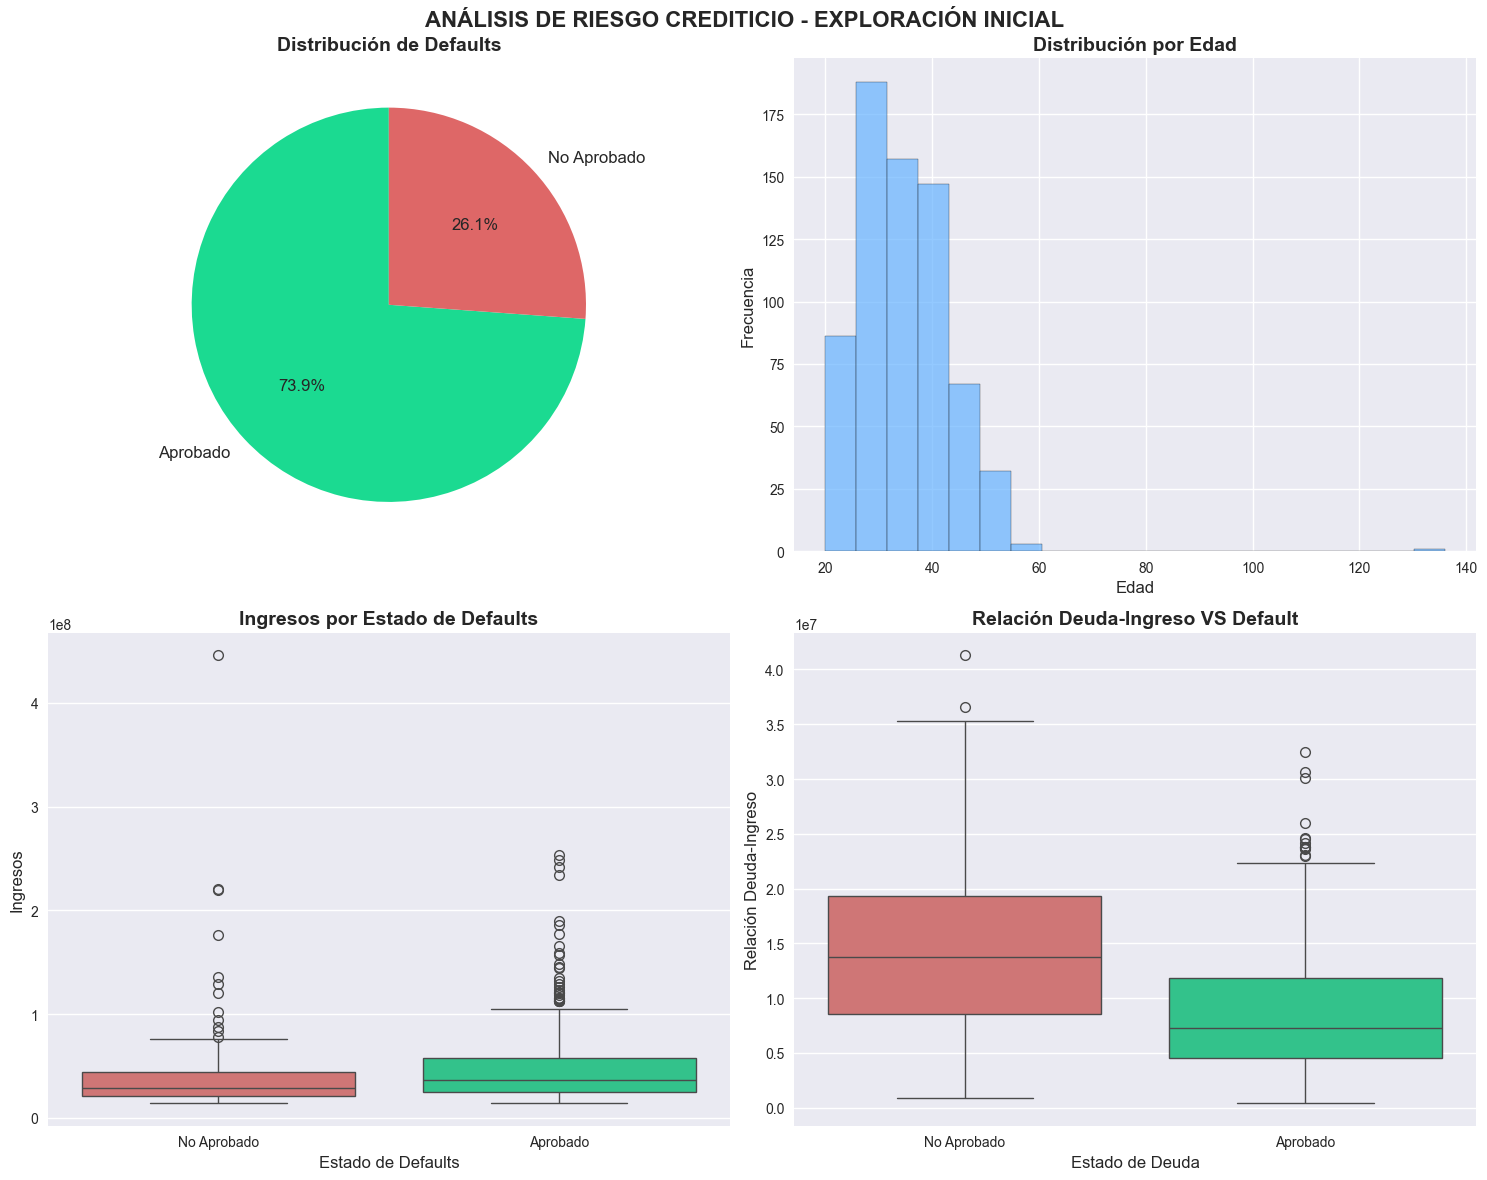

In [9]:
#Creación de visualizaciones
# sustitucion en default
df['default_label'] = df['default'].map({0: 'Aprobado', 1: 'No Aprobado'})
label_distribution = df['default_label'].value_counts()
fig, ax = plt.subplots(2,2, figsize=(15,12))
fig.suptitle('ANÁLISIS DE RIESGO CREDITICIO - EXPLORACIÓN INICIAL', fontsize=16, fontweight='bold')

# Gráfico 1: Distribución de defaults
ax[0, 0].pie(
    label_distribution.values, 
    labels=label_distribution.index, 
    autopct='%1.1f%%', startangle=90,
    colors=["#1bda91", "#de6767"],
    textprops={'fontsize': 12}
) 
ax[0,0].set_title('Distribución de Defaults', fontsize=14, fontweight='bold')


# Gráfico 2: Distribución por edad
ax[0,1].hist(df['age'], bins=20, alpha=.7, color='#66b3ff', edgecolor='black')
ax[0,1].set_title('Distribución por Edad', fontsize=14, fontweight='bold')
ax[0,1].set_xlabel('Edad', fontsize=12)
ax[0,1].set_ylabel('Frecuencia', fontsize=12)

# Gráfico 3: Ingresos VS Defaults
sns.boxplot(x='default_label', y='income', data=df, ax=ax[1,0], palette=["#de6767", "#1bda91"])
ax[1,0].set_title('Ingresos por Estado de Defaults', fontsize=14, fontweight='bold')
ax[1,0].set_xlabel('Estado de Defaults', fontsize=12)
ax[1,0].set_ylabel('Ingresos', fontsize=12),


# Gráfico 4: Relación Deuda-Ingreso VS Default
sns.boxplot(x='default_label', y='debtinc', data=df, ax=ax[1, 1], palette=["#de6767", "#1bda91"])
ax[1,1].set_title('Relación Deuda-Ingreso VS Default', fontsize=14, fontweight='bold')
ax[1,1].set_xlabel('Estado de Deuda', fontsize=12)
ax[1,1].set_ylabel('Relación Deuda-Ingreso', fontsize=12)

plt.tight_layout()
plt.show

==========================  
    4. Análisis de Correlaciones 
=============================


    
📊 · Correlación con la variable objetivo: 
debtinc     0.389575
employ     -0.282978
creddebt    0.244740
address    -0.163657
othdebt     0.145713
age        -0.135190
ed          0.131137
income     -0.076670
Name: default, dtype: float64




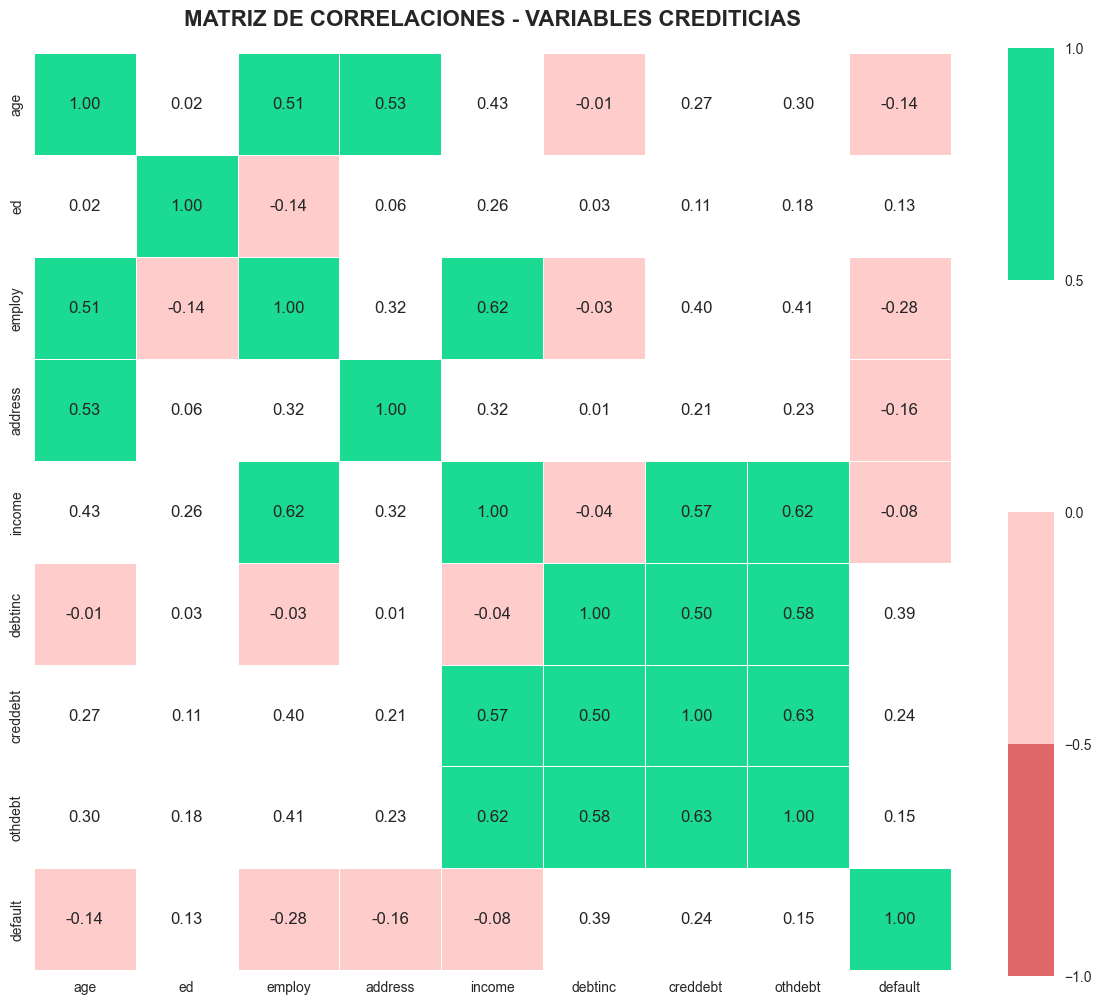

In [10]:
# Matriz de correlaciones
numeric_cols = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']
correlation_matrix = df[numeric_cols].corr()
default_correlation = correlation_matrix['default'].sort_values(key=abs,ascending=False)
# excluir la correlación con sí mismo
print(f'''
    \n📊 · Correlación con la variable objetivo: \n{default_correlation[1:]}\n
''')

# colormap personalizado
# puntos de corte
colors=['#de6767','#ffcccc','white','#ccffcc', "#1bda91"]
bounds = [-1, -.5, 0, .5, 1]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Gráfico de correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap=cmap, 
    norm=norm,
    fmt=".2f",
    linewidths=.5, 
    cbar=True, 
    square=True, 
    annot_kws={"size": 12}
)
plt.title(
    'MATRIZ DE CORRELACIONES - VARIABLES CREDITICIAS', 
    fontsize=16, fontweight='bold', pad=20
)
plt.tight_layout()
plt.show()


==========================  
    5. Segmentación y Análisis por grupos 
=============================

In [11]:
print(df['creddebt'].max())
print(df['creddebt'].min())    

20561310
11696


In [12]:
# Crear segmentos de edad
df['age_segment'] = pd.cut(
    df['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['Joven (<=30)', 'Adulto (31-40)', 'Maduro (40-50)', 'Senior (60+)']
)
# Crear segmentos de ingresos
df['income_segment'] = pd.qcut(
    df['income'],
    q=4,
    labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
)

# Segmento por Empleo
df['creddebt_segment'] = pd.cut(
    df['creddebt'],
    bins=[0, 10000,10000000,27000000],
    labels=['Bajo', 'Medio', 'Alto']
    
)

# Análisis por segmentos
print('TASA DE DEFAULT POR SEGMENTO DE EDAD:')
age_default=df.groupby('age_segment')['default'].agg(['count','sum', 'mean']).round(3)
age_default.columns = ['Total_Casos', 'Total_Default', 'Tasa_Default']
print(age_default)

print('\n\nTASA DE DEFAULT POR SEGMENTO DE INGRESOS:')
income_default=df.groupby('income_segment')['default'].agg(['count', 'sum', 'mean']).round(3)
income_default.columns = ['Total_Casos', 'Total_Default', 'Tasa_Default']
print(income_default)


TASA DE DEFAULT POR SEGMENTO DE EDAD:
                Total_Casos  Total_Default  Tasa_Default
age_segment                                             
Joven (<=30)            238             84         0.353
Adulto (31-40)          364             75         0.206
Maduro (40-50)           78             20         0.256
Senior (60+)              0              0           NaN


TASA DE DEFAULT POR SEGMENTO DE INGRESOS:
                Total_Casos  Total_Default  Tasa_Default
income_segment                                          
Bajo                    176             67         0.381
Medio-Bajo              161             36         0.224
Medio-Alto              160             38         0.238
Alto                    166             29         0.175


==========================  
    6. Identificación de Factores de Riesgo 
=============================

ESTADÍSTICA POR ESTADO DE DEFAULT:

🔸AGE
         count   mean   std   min    max
default                                 
0          502  35.61  8.91  20.0  136.0
1          179  32.89  8.42  20.0   55.0

🔸EMPLOY
         count  mean   std  min  max
default                             
0          517  9.51  6.66    0   31
1          183  5.22  5.54    0   31

🔸INCOME
         count         mean          std         min          max
default                                                          
0          493  47427991.89  34710553.84  14000000.0  253000000.0
1          170  40858823.53  44174654.15  14000000.0  446000000.0

🔸DEBTINC
         count         mean         std     min       max
default                                                  
0          517   8679303.68  5615197.50  400000  32500000
1          183  14727868.85  7902798.18  900000  41300000

🔸TOTAL_DEBT_RATIO
         count  mean   std   min   max
default                               
0          493  0.09  0.06

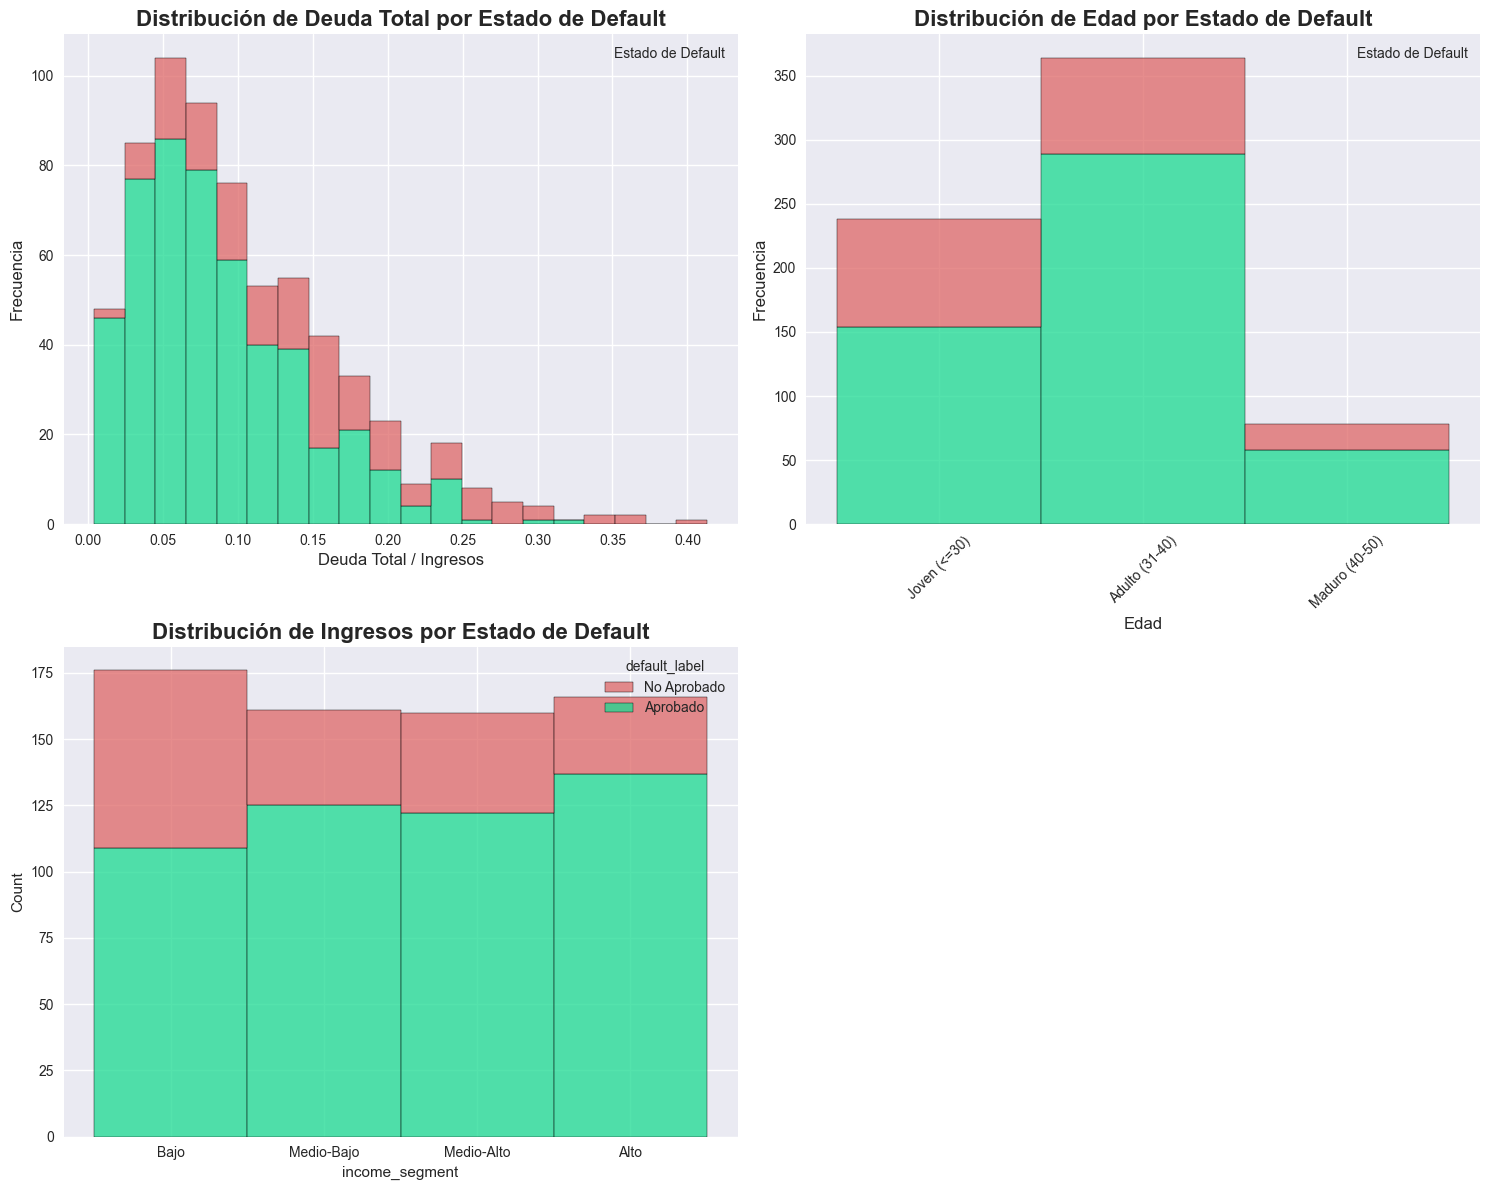

In [13]:
# crear ratio deuda total vs ingresos
df['total_debt_ratio'] = (df['creddebt'] + df['othdebt']) / df['income']
df['total_deb_ratio'] = df['total_debt_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Análisis estádisticos por default
print('ESTADÍSTICA POR ESTADO DE DEFAULT:')
for col in ['age', 'employ', 'income', 'debtinc', 'total_debt_ratio']:
    if col in df.columns: 
        print(f'\n🔸{col.upper()}')
        default_stats = df.groupby('default')[col].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
        print(default_stats)

# Análisis de correlaciones por default
        
# grafica Ratio por defult
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(
    data=df,
    x='total_debt_ratio',
    hue='default_label',
    multiple='stack',
    ax=ax[0,0],
    palette=["#de6767", "#1bda91"],
    bins=20
)
ax[0,0].set_title(
    'Distribución de Deuda Total por Estado de Default',
      fontsize=16, fontweight='bold'
)
ax[0,0].set_xlabel('Deuda Total / Ingresos', fontsize=12)
ax[0,0].set_ylabel('Frecuencia', fontsize=12)
ax[0,0].legend(title='Estado de Default', loc='upper right')


# grafica de edad por default
sns.histplot(
    data=df,
    x='age_segment',
    hue='default_label',
    multiple='stack',
    ax=ax[0,1],
    palette=["#de6767", "#1bda91"]
)
ax[0,1].set_title(
    'Distribución de Edad por Estado de Default',
    fontsize=16, fontweight='bold'
)
ax[0,1].set_xlabel('Edad', fontsize=12)
ax[0,1].set_ylabel('Frecuencia', fontsize=12)
ax[0,1].tick_params(axis='x', rotation=45)
ax[0,1].legend(title='Estado de Default', loc='upper right')

# grafica de ingresos por default
sns.histplot(
    data=df,
    x='income_segment',
    hue='default_label',
    multiple='stack',
    ax=ax[1,0],
    palette=["#de6767", "#1bda91"]
)

ax[1,0].set_title(
    'Distribución de Ingresos por Estado de Default',
    fontsize=16, fontweight='bold'
)

# grafica de credito por default
ax[1,1].set_visible(False)

plt.tight_layout()
plt.show()

==========================  
    7. Modelo Predictivo Simple 
=============================

In [21]:
# Preparar datos para modelado 
features = ['age','ed','employ','address','income', 'debtinc', 'creddebt', 'othdebt']
X = df[features].fillna(df[features].mean())
y = df['default']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 
  
# Entrenar al modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)

print(f'\n Precisión del Modelo: {accuracy:.2%}')
print('\n Reporte de Clasifición:')
print(classification_report(y_test, y_pred))

# Importancia de variables
feature_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f'\n VARIABLES MAS IMPORTANTES PARA PREDECIR DEFAULT:\n{feature_importance}')


 Precisión del Modelo: 81.43%

 Reporte de Clasifición:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       155
           1       0.67      0.56      0.61        55

    accuracy                           0.81       210
   macro avg       0.76      0.73      0.75       210
weighted avg       0.81      0.81      0.81       210


 VARIABLES MAS IMPORTANTES PARA PREDECIR DEFAULT:
   Variable  Importancia
5   debtinc     0.217056
2    employ     0.150751
6  creddebt     0.145946
7   othdebt     0.134531
0       age     0.110756
4    income     0.104987
3   address     0.097942
1        ed     0.038031


==========================  
    8. KPIs Principales Identificados 
=============================

In [24]:
# Calcurar KPIs
total_customers = len(df)
total_defaults = df['default'].sum()
default_rate = (total_defaults / total_customers) * 100
avg_income = df['income'].mean()
avg_debt_ratio = df['debtinc'].mean()
high_risk_threshold = df['total_deb_ratio'].quantile(0.8)
high_risk_customers = (df['total_deb_ratio'] > high_risk_threshold).sum()

print(f'''
    KPIs Principales:\n
    ·Total de Clientes: {total_customers:,}
    ·Total de Defaults: {total_defaults:,}
    ·Tasa de Default General: {default_rate:.2f}%
    ·Ingreso Promedio: ${avg_income:,.0f}
    ·Ratio Deuda-Ingreso Promedio: {avg_debt_ratio:.0f}
    ·Clientes Alto Riesgo: {high_risk_customers:,}({high_risk_customers / total_customers * 100:.1f}%)\n\n     

    Top 3 Variables Predictorias
    1. {feature_importance.iloc[0]['Variable']}: {feature_importance.iloc[0]['Importancia']:.3f}
    2. {feature_importance.iloc[1]['Variable']}: {feature_importance.iloc[1]['Importancia']:.3f}
    3. {feature_importance.iloc[2]['Variable']}: {feature_importance.iloc[2]['Importancia']:.3f}
''')
  


    KPIs Principales:

    ·Total de Clientes: 700
    ·Total de Defaults: 183
    ·Tasa de Default General: 26.14%
    ·Ingreso Promedio: $45,743,590
    ·Ratio Deuda-Ingreso Promedio: 10260571
    ·Clientes Alto Riesgo: 137(19.6%)

     

    Top 3 Variables Predictorias
    1. debtinc: 0.217
    2. employ: 0.151
    3. creddebt: 0.146

